<h3>Library Imports</h3>

In [1]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import tensorflow as tf
from tensorflow.keras import layers, models
from keras.callbacks import EarlyStopping

<h3>Data Processing</h3>

Class file contains the object id of the different galaxies and their respective Classifications.

In [2]:
class_file = pd.read_csv('gz2_hart16.csv')
class_file.head()

,dr7objid,ra,dec,rastring,decstring,sample,gz2_class,total_classifications,total_votes,t01_smooth_or_features_a01_smooth_count,...,t11_arms_number_a36_more_than_4_fraction,t11_arms_number_a36_more_than_4_weighted_fraction,t11_arms_number_a36_more_than_4_debiased,t11_arms_number_a36_more_than_4_flag,t11_arms_number_a37_cant_tell_count,t11_arms_number_a37_cant_tell_weight,t11_arms_number_a37_cant_tell_fraction,t11_arms_number_a37_cant_tell_weighted_fraction,t11_arms_number_a37_cant_tell_debiased,t11_arms_number_a37_cant_tell_flag
0,587732591714893851,179.042984,60.522518,11:56:10.32,+60:31:21.1,original,Sc+t,45,342,0,...,0.450,0.450,0.482646,0,16,16.0,0.400,0.400,0.394506,0
1,588009368545984617,135.084396,52.494240,09:00:20.26,+52:29:39.3,original,Sb+t,42,332,1,...,0.512,0.503,0.504833,0,13,13.0,0.317,0.323,0.322743,0
2,587732484359913515,183.371979,50.741508,12:13:29.27,+50:44:29.4,original,Ei,36,125,28,...,0.000,0.000,0.000000,0,0,0.0,0.000,0.000,0.000000,0
3,587741723357282317,186.251953,28.558598,12:25:00.47,+28:33:31.0,original,Sc+t,28,218,1,...,0.240,0.240,0.241322,0,6,6.0,0.240,0.240,0.239765,0
4,587738410866966577,161.086395,14.084465,10:44:20.73,+14:05:04.1,original,Er,43,151,33,...,0.000,0.000,0.000000,0,0,0.0,0.000,0.000,0.000000,0


The map file uses the object id to find its respect image from the dataset using the asset_id.

In [3]:
map_file = pd.read_csv('gz2_filename_mapping.csv')
map_file.head()

,objid,sample,asset_id
0,587722981736120347,original,1
1,587722981736579107,original,2
2,587722981741363294,original,3
3,587722981741363323,original,4
4,587722981741559888,original,5


Both the data files are merged into single dataframe for ease of access.

In [4]:
merge_data = pd.merge(map_file, class_file, left_on='objid', right_on='dr7objid', how='right')
merge_data.head()

,objid,sample_x,asset_id,dr7objid,ra,dec,rastring,decstring,sample_y,gz2_class,...,t11_arms_number_a36_more_than_4_fraction,t11_arms_number_a36_more_than_4_weighted_fraction,t11_arms_number_a36_more_than_4_debiased,t11_arms_number_a36_more_than_4_flag,t11_arms_number_a37_cant_tell_count,t11_arms_number_a37_cant_tell_weight,t11_arms_number_a37_cant_tell_fraction,t11_arms_number_a37_cant_tell_weighted_fraction,t11_arms_number_a37_cant_tell_debiased,t11_arms_number_a37_cant_tell_flag
0,587732591714893851,original,58957,587732591714893851,179.042984,60.522518,11:56:10.32,+60:31:21.1,original,Sc+t,...,0.450,0.450,0.482646,0,16,16.0,0.400,0.400,0.394506,0
1,588009368545984617,original,193641,588009368545984617,135.084396,52.494240,09:00:20.26,+52:29:39.3,original,Sb+t,...,0.512,0.503,0.504833,0,13,13.0,0.317,0.323,0.322743,0
2,587732484359913515,original,55934,587732484359913515,183.371979,50.741508,12:13:29.27,+50:44:29.4,original,Ei,...,0.000,0.000,0.000000,0,0,0.0,0.000,0.000,0.000000,0
3,587741723357282317,original,158501,587741723357282317,186.251953,28.558598,12:25:00.47,+28:33:31.0,original,Sc+t,...,0.240,0.240,0.241322,0,6,6.0,0.240,0.240,0.239765,0
4,587738410866966577,original,110939,587738410866966577,161.086395,14.084465,10:44:20.73,+14:05:04.1,original,Er,...,0.000,0.000,0.000000,0,0,0.0,0.000,0.000,0.000000,0


Only the necessary features are spliced to form the new dataframe.

In [5]:
df = merge_data[['objid','gz2_class','asset_id']]
df.head(10)

,objid,gz2_class,asset_id
0,587732591714893851,Sc+t,58957
1,588009368545984617,Sb+t,193641
2,587732484359913515,Ei,55934
3,587741723357282317,Sc+t,158501
4,587738410866966577,Er,110939
5,587729751132209314,Ei,249897
6,587733608555216981,Ei,71801
7,587735742617616406,Sb+t,87614
8,587738574068908121,Ei,113304
9,587731870708596837,Sb?t,47197


The galaxy type is made simpler by creating a new column with proper classifications. All classifications from 'gz2_class' column that starts with 'S' is considered a Spiral Galaxy and 'E' is considered an Elliptical Galaxy. The New Column 'Class' only the first character from the 'gz2_class' which denotes the basic type of galaxy.

In [6]:
df['Class'] = df['gz2_class'].str[0]
df['Class'].value_counts()

C:\Users\Faheem\AppData\Local\Temp/ipykernel_3376/1008743462.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Class'] = df['gz2_class'].str[0]


S    141430
E     97670
A       595
Name: Class, dtype: int64

The Data also contains irregular galaxy types but these are dropped from the data because of the low data availability.

In [7]:
df = df.drop(df[df.Class=='A'].index)
df['Class'].value_counts()

S    141430
E     97670
Name: Class, dtype: int64

I am taking only 20% of the total data available due to low processing power availability. 

In [8]:
sample = df.sample(frac=.2) 
sample['Class'].value_counts()

S    28299
E    19521
Name: Class, dtype: int64

Checking one of the images to verify integrity.

In [9]:
sample.tail(15)

,objid,gz2_class,asset_id,Class
165475,587732578842247296,Ec,57535,E
233288,587736586579280093,Sd3m,256387,S
72851,587742061078446226,Ei,167145,E
209735,587741421640286384,Sb(m),149300,S
7739,587742062171324480,Ei(m),169028,E
132476,587742014353244230,Sb2m,164355,S
64121,587739827660652720,SBc?m,142641,S
85129,587728678467207324,Ei,24926,E
62264,587742576989896800,Er,176027,E
150627,588016890640597093,Sc?l,206707,S


In [10]:
sample['Class'].loc[sample['asset_id'] == 164355].item()

'S'

<h3>Image Processing</h3>

In [11]:
Img_Directory =  'images_gz2\images'
image_data = []
i=0

The images for the galaxies are read in as pixels and  resized to make it easier to process. One of the images is also checked for verified.

In [12]:
for img in sample['asset_id']:
    img_pixels = cv2.imread((os.path.join(Img_Directory,str(img)+'.jpg')))
    try:
        resize_image = cv2.resize(img_pixels,(200,200))
        label = sample['Class'].loc[sample['asset_id'] == img].item()
        image_data.append([resize_image,label])
    except:
        pass

S


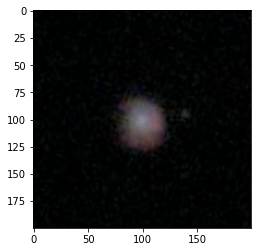

In [13]:
plt.imshow(image_data[19450][0])
print(image_data[19450][1])

<h3>Train Test Split</h3>

80-20 train test split is done.

In [14]:
train = image_data[:int(len(image_data)*(.80))]
test = image_data[int(len(image_data)*(.80)):]

In [15]:
print('Length of train:',len(train))
print('Length of test:',len(test))

Length of train: 38245
Length of test: 9562


The data has to be converted into arrays for use in Convolution Neural Networks. Apart from this the classifications are also encoded for use in the CNN.

In [16]:
x_train = []
y_train = []
x_test = []
y_test = []

In [17]:
for x,y in train:
    x_train.append(x)
    y_train.append(y)

In [18]:
le = preprocessing.LabelEncoder()
Y_train = le.fit_transform(y_train)

In [19]:
x_train = np.array(x_train).reshape(-1,200,200,3)

In [20]:
for x,y in test:
    x_test.append(x)
    y_test.append(y)

In [21]:
x_test = np.array(x_test).reshape(-1,200,200,3)

In [22]:
Y_test = le.fit_transform(y_test)

Final verification of the processed data.

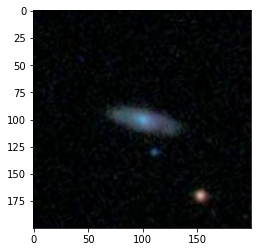

S


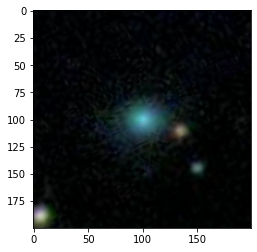

E


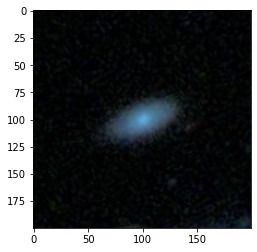

S


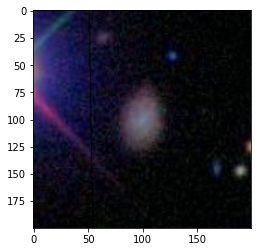

S


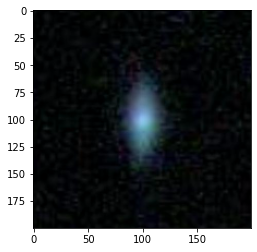

E


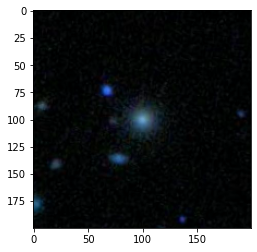

S


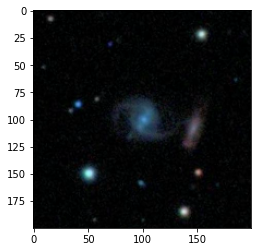

S


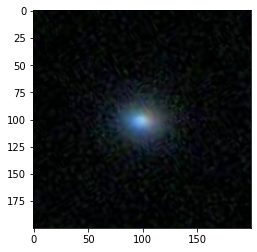

E


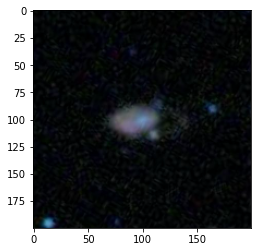

S


In [23]:
for i in range(0,9):
    plt.imshow(x_train[i])
    plt.show()
    print(y_train[i])

<h3>Convolution Neural Networks</h3>

Building the Convoltion Neural Network Architecture.

In [24]:
model = models.Sequential()
model.add(layers.Conv2D(16, (3, 3), activation='relu', input_shape=(200,200,3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))
          
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

An early stopping mechanism is used to stop the training if the validation loss does not improve for 3 epochs.

In [25]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)

In [26]:
history = model.fit(x_train,Y_train, batch_size = 32, epochs =20, validation_split=0.1, callbacks=[es])

Epoch 1/20
1076/1076 [==============================] - 460s 425ms/step - loss: 0.5474 - accuracy: 0.7311 - val_loss: 0.4986 - val_accuracy: 0.7527
Epoch 2/20
1076/1076 [==============================] - 453s 421ms/step - loss: 0.4696 - accuracy: 0.7759 - val_loss: 0.4871 - val_accuracy: 0.7673
Epoch 3/20
1076/1076 [==============================] - 451s 419ms/step - loss: 0.4257 - accuracy: 0.7999 - val_loss: 0.4496 - val_accuracy: 0.7882
Epoch 4/20
1076/1076 [==============================] - 455s 423ms/step - loss: 0.3844 - accuracy: 0.8210 - val_loss: 0.4932 - val_accuracy: 0.7822
Epoch 5/20
1076/1076 [==============================] - 455s 423ms/step - loss: 0.3420 - accuracy: 0.8446 - val_loss: 0.5843 - val_accuracy: 0.7799
Epoch 6/20
1076/1076 [==============================] - 459s 427ms/step - loss: 0.2944 - accuracy: 0.8672 - val_loss: 0.5766 - val_accuracy: 0.7770
Epoch 6: early stopping


Plotting the loss curve and accuracy.

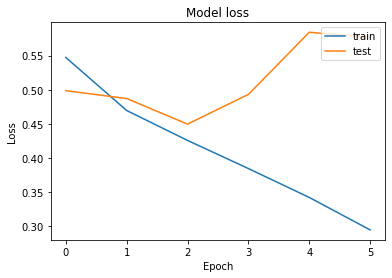

In [27]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

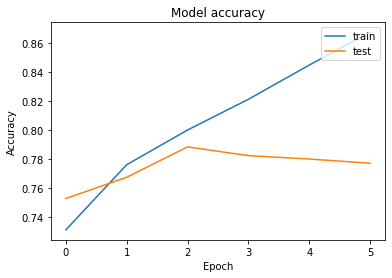

In [28]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

Evaluating the model with test set.

In [29]:
results = model.evaluate(x_test, Y_test, batch_size=32)

299/299 [==============================] - 30s 101ms/step - loss: 0.5937 - accuracy: 0.7663
